<a href="https://colab.research.google.com/github/AdaTuanaDonmez/AdaTuanaDonmez/blob/main/Data_Mining_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CLUSTER ANALYSIS

import pandas as pd
import numpy as np      #broadcasting
import seaborn as sns           #charts
import matplotlib.pyplot as plt    #visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline



In [ ]:
df = pd.read_csv("/content/single_family_home_values[1].csv")

# New Section

In [ ]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963


In [ ]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [ ]:
X = df.drop("estimated_value", axis = 1) #estimated_value dropped
X

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaN,NaN
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0


In [ ]:
X = X[["bedrooms",	"bathrooms",	"rooms",	"squareFootage",	"lotSize",	"yearBuilt", "priorSaleAmount"]]
X.head(2)


,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,NaN


In [ ]:
X.fillna(0, inplace=True)

<ipython-input-8-67b4599ed24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
kmeans = KMeans(n_clusters= 5, random_state = 0).fit(X)  #random_state = 0 makes it reproducible with 0
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
labels = kmeans.labels_   #clusters are from 0 to 4 (in total 5), Explanation: Example interpretation:
kmeans.labels_
#The first data point is assigned to cluster 1.
#The second data point is also assigned to cluster 1.
#The third data point is assigned to cluster 1.
#The pattern continues for all data points.

array([1, 1, 1, ..., 0, 4, 0], dtype=int32)

In [ ]:
len(kmeans.labels_ ) # number of data: 15000
X.shape # (15000 rows 7 columns)
len(kmeans.labels_ ), X.shape

(15000, (15000, 7))

In [ ]:
kmeans.cluster_centers_  #7 dimension features (7 columns), #Column 1 (bedrooms): The average number of bedrooms in the cluster., Column 2 (bathrooms): The average number of bathrooms in the cluster....,  shows the means
# kmeans.cluster_centers_.shape   # (5,7)  # 5 clusters, 7 columns



array([[3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
        6.97174968e+03, 1.94200506e+03, 7.43586930e+05],
       [2.64078392e+00, 1.93525180e+00, 5.86293724e+00, 1.39300918e+03,
        5.94409712e+03, 1.93060060e+03, 3.93563157e+04],
       [3.00000000e+00, 4.50000000e+00, 9.00000000e+00, 3.74800000e+03,
        8.59750000e+03, 1.99800000e+03, 1.37500550e+07],
       [3.73118280e+00, 5.64516129e+00, 1.04408602e+01, 4.51996774e+03,
        1.30122688e+04, 1.96766667e+03, 2.37729552e+06],
       [2.70373430e+00, 2.27247191e+00, 6.20290813e+00, 1.47484848e+03,
        5.39461203e+03, 1.92551404e+03, 2.93157062e+05]])

In [ ]:
kmeans.cluster_centers_[0]

array([3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
       6.97174968e+03, 1.94200506e+03, 7.43586930e+05])

In [ ]:
X["cluster"] = labels
X.head(2)

<ipython-input-14-5bbb2b71add4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = labels


,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount,cluster
0,3,2.0,6,1378,9968,2003.0,165700.0,1
1,2,2.0,6,1653,6970,2004.0,0.0,1


In [ ]:
X.groupby("cluster").mean()
X.groupby("cluster").min()
X.groupby("cluster").max()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,13,12.0,39,8456,30200,2016.0,1550000.0
1,9,9.0,22,10907,122839,2016.0,166200.0
2,3,5.0,10,4141,13279,2002.0,16000000.0
3,15,9.0,20,9394,97125,2016.0,5000000.0
4,10,11.0,21,7004,23700,2016.0,518000.0


In [ ]:
#which cluster to use, how well the clusters are

for i in range(3,10):
  kmeans = KMeans(n_clusters = i).fit(X)
  labels = kmeans.labels_
  print(silhouette_score(X, labels))

#Values above 0.5 suggest that the clusters are well-defined and distinct from each other.

#A score close to +1 suggests that the data points within a cluster are well-matched to each other and poorly matched to neighboring clusters. This indicates a good and compact clustering.

#A score close to 0 indicates that the data points are close to the decision boundary between two neighboring clusters. It suggests overlapping clusters.

#A score close to -1 suggests that a data point may have been assigned to the wrong cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6145730276718769


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6166029879402746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6329170513176353


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6446936513210179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6592385754572507


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6608778660424627


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6567055404608985


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression # 2nd for classification
from sklearn.svm import SVC, SVR  #suppor vector mschine, support vector classifier, support vector regressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X = X.drop("cluster", axis=1)
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0


In [ ]:
y =  df.estimated_value
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [ ]:
lg = LinearRegression()
lg.fit(X,y)
lg.score(X,y)


0.7648477834199695

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_train.shape, y_train.shape

((11250, 7), (11250,))

In [ ]:
lg = LinearRegression()
lg.fit(X_train,y_train) #training, fit
lg.score(X_test,y_test) #evaluate, score, R2

# we can explain 77% of the variance

0.7777872596821086

In [ ]:
df["estimated_value_bins"] = df.estimated_value.apply(lambda x: "high" if x>500000 else "low")  #categorical data

In [ ]:
df.estimated_value_bins.value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [ ]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,estimated_value_bins
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,low
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,low


In [ ]:
y2 = df.estimated_value_bins

In [ ]:
log= LogisticRegression()

In [ ]:
X_train, X_test, y2_train, y2_test = train_test_split(X,y2)

In [ ]:
log.fit(X_train, y2_train)

LogisticRegression()

In [ ]:
log.score(X_test, y2_test)  #82% making the right prediction compared to reality

0.8330666666666666

In [ ]:
y_pred = log.predict(X_test)  #prediction
print(y_pred)

['low' 'high' 'high' ... 'low' 'low' 'high']


In [ ]:
np.array(y2_test) #reality

array(['high', 'high', 'high', ..., 'low', 'low', 'low'], dtype=object)

In [ ]:
confusion_matrix(y2_test, y_pred)   #the diagonal is the match of your prediction, top right is Type I error, bottom left Type 2 error

#             real value
#           high       low
#pred(h)      1         2
#pred(l)      3         4
#1: predicted high (y axis) actual value high
#2: predicted high (y axis) actual value low (Type I)  (rejecting the truth that it is low)
#3:  (Type 2) error (it should be high but shown as low ) (failing to reject that it is low by showing low and not high )
#4: actual values

array([[1644,  355],
       [ 271, 1480]])

In [ ]:
# SVM: Support Vector Machine is a classifier, pushing different dataset points from each other

svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.052725106236362285

In [ ]:
svc = SVC()
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7066666666666667

In [ ]:
y2_pred = svc.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

array([[1060,  939],
       [ 161, 1590]])

In [ ]:
#KNN : k-nearest neighbors, given known data points, classifying an unknown data point according to known close neighbors

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)




KNeighborsRegressor()

In [ ]:
knn.score(X_test, y_test)

-0.2328926649043186

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y2_test_encoded = label_encoder.fit_transform(y2_test)

knn.score(X_test, y2_test_encoded)

-1852992930454.3206

In [ ]:
y2_pred = knn.predict(X_test)

In [ ]:
# confusion_matrix(y2_test, y2_pred)

In [ ]:
y = df.estimated_value

In [ ]:
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [ ]:
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


<Axes: >

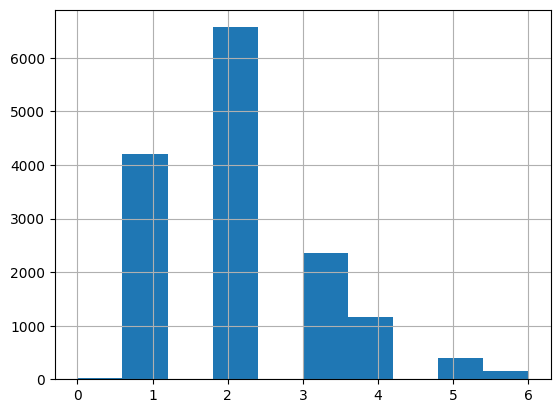

In [ ]:
#Removing Outliers:

#Three Sigma Rule

X2 = X[(X.bedrooms < 7) & (X.bathrooms < 7)]  #from the histogram visually seeing and detecting, no and operator
X2.bathrooms.hist()




<Axes: >

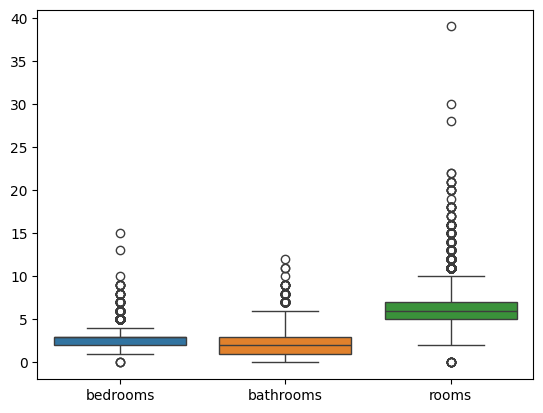

In [ ]:
#Boxplot Rule

sns.boxplot(X[["bedrooms","bathrooms","rooms"]])

<ipython-input-49-d5d52ccf1ccb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())
<ipython-input-49-d5d52ccf1ccb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)


<Axes: >

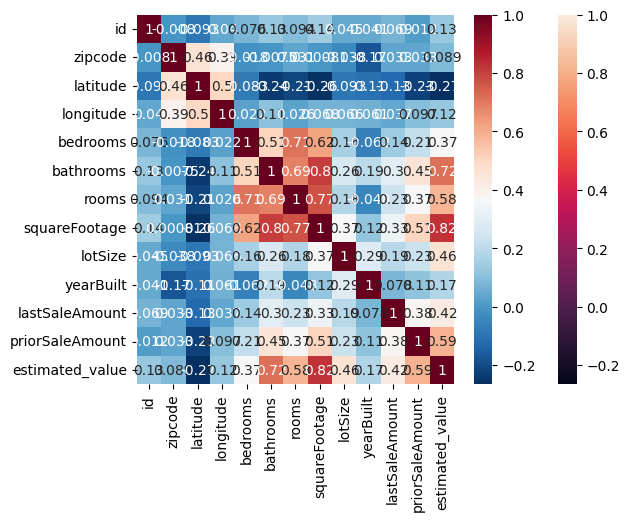

In [ ]:
#Correlation and Association

sns.heatmap(df.corr())

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)

In [ ]:
df.cov() #covarience leads to correlation (-1 to 1)

<ipython-input-50-f4a0a06c5797>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov() #covarience leads to correlation (-1 to 1)


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


In [ ]:
#DIMENSIONALITY


from sklearn.decomposition import PCA #compressor - principle component analysis
pca = PCA(4) # the number 4 comes from research, has to be less than original features


In [ ]:
X # has 7 features
X.shape

(15000, 7)

In [ ]:
X_transformed = pca.fit_transform(X)

In [ ]:
X_transformed.shape #4 features

(15000, 4)

In [ ]:
pca.components_.shape  #(4,7)  4 components made out of original 7

(4, 7)

In [ ]:
pca.components_[0]

array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

In [ ]:
y #estimated_value in the table

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [ ]:
lg = LinearRegression()  #Here, a linear regression model is created by instantiating the LinearRegression class
X_train, X_test, y_train , y_test = train_test_split(X_transformed, y)
lg.fit(X_train, y_train) #called to train the linear regression model on the training data, finding the coefficients that minimize the sum of squared differences between the actual and predicted values (SSE)
lg.score(X_test, y_test) # Calculates R2 squared

# We did this to check if the explanation of the variability (R squared) increased when compressed

0.774596481064163